*Air resistance can require a linear or quadratic correction, depending on the diameter and speed of the object. Sometimes there is a combined linear and quadratic effect*

Skydiving Problem: Quadratic Air Resistance
$$ \vec{F} = m \begin{pmatrix} \frac{dv_x}{dt} \\ \frac{dv_y}{dt} \end{pmatrix}$$
Gravity
$$ \vec{F_g} = m \begin{pmatrix} 0 \\ g \end{pmatrix} $$
Friction
$$ \vec{F_f} = -b |\vec{v}|^2 \hat{v} = -b |\vec{v}| \vec{v} = -b \sqrt{v_x^2 + v_y^2} \begin{pmatrix} v_x \\ v_y \end{pmatrix} $$
Therefore
$$ \frac{dv_x}{dt} = -\frac{b}{m}\sqrt{v_x^2 + v_y^2} \cdot v_x$$
$$ \frac{dv_x}{dt} = -g -\frac{b}{m}\sqrt{v_x^2 + v_y^2} \cdot v_y$$
Solve for $\vec{S} = (v_x, v_y)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

1. Define function that takes $t$ and $\vec{S}$ and returns $\frac{d\vec{S}}{dt}$

In [3]:
def dSdt(S, t, g, m, b):
    vx = S[0]
    vy = S[1]
    return [
        (-b/m)*np.sqrt(vx**2+vy**2)*vx, # dvx/dt
        (-b/m)*np.sqrt(vx**2+vy**2)*vy - g # dvy/dt
    ]

2. Supply the function and initial conditions to the ODE solver. Provide the time at which you want the solution

In [11]:
vt = -55 # teminal velocity
g = 9.81
m = 80
b = m*g/(vt**2) # see derivation below
t = np.linspace(0, 20, 100)
v0x, v0y = 50, 0
sol = odeint(func=dSdt, y0=[v0x, v0y], t=t, args=(g, m, b))

At terminal velocity $v_t$
$$F_{up} = F_{down}$$
Therefore
$$mg = v_t^2 * b$$
Therefore
$$b = mg/v_t^2$$

In [14]:
vx = sol.T[0]
vy = sol.T[1]

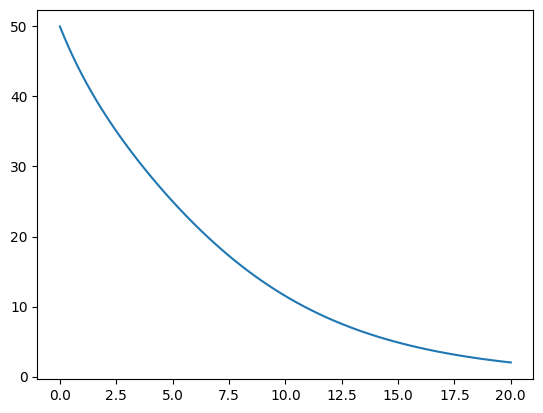

In [15]:
plt.plot(t, vx)

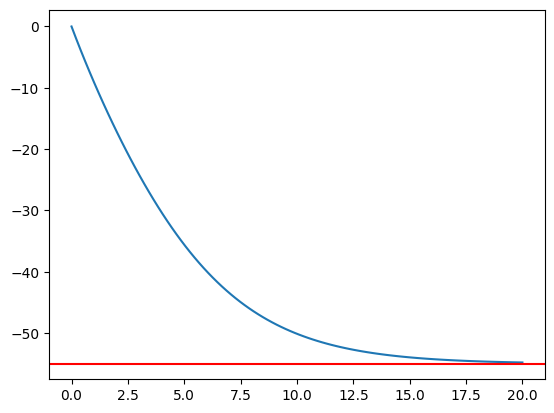

In [18]:
plt.plot(t, vy)
plt.axhline(vt, color='red')

How long until one reaches terminal velocity?

In [27]:
ind = np.abs(vy-vt)/np.abs(vt) < 0.01

In [28]:
t[ind]

array([17.17171717, 17.37373737, 17.57575758, 17.77777778, 17.97979798,
       18.18181818, 18.38383838, 18.58585859, 18.78787879, 18.98989899,
       19.19191919, 19.39393939, 19.5959596 , 19.7979798 , 20.        ])